# Exploring San Francisco's Crime During the Period of 2018 to Present
Data from this source: [SFPD Crime Reporting](https://data.sfgov.org/Public-Safety/Police-Department-Incident-Reports-2018-to-Present/wg3w-h783/about_data)

## Importing Requirements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import numpy as np

from scipy.stats import circmean
from sklearn.linear_model import LinearRegression

## Loading, Transforming Data and Initial Information

In [2]:
data = pd.read_csv('Police_Department_Incident_Reports__2018_to_Present_20250303.csv')
data.head(5)

,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,...,Longitude,Point,Neighborhoods,ESNCAG - Boundary File,Central Market/Tenderloin Boundary Polygon - Updated,Civic Center Harm Reduction Project Boundary,HSOC Zones as of 2018-06-05,Invest In Neighborhoods (IIN) Areas,Current Supervisor Districts,Current Police Districts
0,2023/03/01 05:02:00 AM,2023/03/01,05:02,2023,Wednesday,2023/03/11 03:40:00 PM,125379506374,1253795,236046151,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023/03/13 10:59:00 AM,2023/03/13,10:59,2023,Monday,2023/03/13 11:00:00 AM,125355107041,1253551,230174885,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023/03/14 06:44:00 PM,2023/03/14,18:44,2023,Tuesday,2023/03/14 06:45:00 PM,125402407041,1254024,230176728,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023/02/15 03:00:00 AM,2023/02/15,03:00,2023,Wednesday,2023/03/11 04:55:00 PM,125378606372,1253786,236046123,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023/03/13 11:26:00 AM,2023/03/13,11:26,2023,Monday,2023/03/13 01:37:00 PM,125419506244,1254195,236046850,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
print(f'Dataset Size: {data.shape}')

Dataset Size: (936633, 35)


In [4]:
col_info = pd.concat([data.dtypes, data.nunique(), data.isna().sum()], axis=1)
col_info.columns = ['dtype','nunique','NaN']
col_info['NaN%'] = (col_info.NaN/len(data) * 100).round(1)
display(col_info)

,dtype,nunique,NaN,NaN%
Incident Datetime,object,446945,0,0.0
Incident Date,object,2618,0,0.0
Incident Time,object,1440,0,0.0
Incident Year,int64,8,0,0.0
Incident Day of Week,object,7,0,0.0
Report Datetime,object,667675,0,0.0
Row ID,int64,936633,0,0.0
Incident ID,int64,781375,0,0.0
Incident Number,int64,674077,0,0.0
CAD Number,float64,536864,207682,22.2


In [5]:
# dropping datetime bc redundant info
# dropping all columns with majority missing information
# dropping other columns not interested in
drop_col = ['CAD Number', 'Report Type Code', 'Report Type Description', 'Point', 'CNN', 'Report Datetime', 'Incident Datetime', 'Filed Online', 'ESNCAG - Boundary File', 'Central Market/Tenderloin Boundary Polygon - Updated', 'Civic Center Harm Reduction Project Boundary', 'HSOC Zones as of 2018-06-05', 'Invest In Neighborhoods (IIN) Areas']

data = data.drop(labels=drop_col, axis=1)
print(f'New Dataset Size: {data.shape}')

New Dataset Size: (936633, 22)


In [6]:
# new col info after removing cols
col_info = pd.concat([data.dtypes, data.nunique(), data.isna().sum()], axis=1)
col_info.columns = ['dtype','nunique','NaN']
col_info['NaN%'] = (col_info.NaN/len(data) * 100).round(1)
display(col_info)

,dtype,nunique,NaN,NaN%
Incident Date,object,2618,0,0.0
Incident Time,object,1440,0,0.0
Incident Year,int64,8,0,0.0
Incident Day of Week,object,7,0,0.0
Row ID,int64,936633,0,0.0
Incident ID,int64,781375,0,0.0
Incident Number,int64,674077,0,0.0
Incident Code,int64,857,0,0.0
Incident Category,object,49,1076,0.1
Incident Subcategory,object,72,1076,0.1


In [7]:
sample = data.sample(5)
display(sample.loc[:, sample.columns[:11]])
display(sample.loc[:, sample.columns[11:]])

,Incident Date,Incident Time,Incident Year,Incident Day of Week,Row ID,Incident ID,Incident Number,Incident Code,Incident Category,Incident Subcategory,Incident Description
720142,2018/09/05,23:20,2018,Wednesday,71120864020,711208,180673519,64020,Non-Criminal,Other,Mental Health Detention
482400,2022/12/05,21:20,2022,Monday,122159204013,1221592,220821165,4013,Assault,Aggravated Assault,"Assault, Aggravated, W/ Other Weapon"
337517,2023/01/22,21:30,2023,Sunday,124674428150,1246744,236029549,28150,Malicious Mischief,Vandalism,"Malicious Mischief, Vandalism to Property"
36835,2023/10/28,12:00,2023,Saturday,133292816420,1332928,230774162,16420,Drug Offense,Drug Violation,"Hallucinogenic, Possession For Sale"
805082,2019/08/25,12:44,2019,Sunday,83867461030,838674,190630032,61030,Other,Other,"Death Report, Cause Unknown"


,Resolution,Intersection,Police District,Analysis Neighborhood,Supervisor District,Supervisor District 2012,Latitude,Longitude,Neighborhoods,Current Supervisor Districts,Current Police Districts
720142,Open or Active,ELLIS ST \ LARKIN ST,Tenderloin,Tenderloin,5.0,6.0,37.784236,-122.417707,20.0,10.0,5.0
482400,Cite or Arrest Adult,23RD ST \ MISSOURI ST,Bayview,Potrero Hill,10.0,10.0,37.754932,-122.395943,54.0,9.0,2.0
337517,Open or Active,NaN,Southern,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36835,Open or Active,GEARY ST \ TAYLOR ST,Central,Tenderloin,3.0,3.0,37.786940,-122.411516,20.0,3.0,6.0
805082,Open or Active,18TH ST \ DOLORES ST,Mission,Mission,8.0,8.0,37.761427,-122.426077,37.0,5.0,3.0


In [8]:
# handling rest of NaN - can't impute values for incident category or location -> just remove rows with missing values
data = data.dropna()
print(f'Dataset size after dropping rows with missing values: {data.shape}')

Dataset size after dropping rows with missing values: (868164, 22)


In [9]:
# new col info after removing rows
col_info = pd.concat([data.dtypes, data.nunique()], axis=1)
col_info.columns = ['dtype','nunique']
display(col_info)

,dtype,nunique
Incident Date,object,2618
Incident Time,object,1440
Incident Year,int64,8
Incident Day of Week,object,7
Row ID,int64,868164
Incident ID,int64,717826
Incident Number,int64,630896
Incident Code,int64,825
Incident Category,object,49
Incident Subcategory,object,72


## Date + Time Transformation
- Convert date and time into continuous variable. 
- Add column for months.

In [10]:
time_cols = ['Incident Date', 'Incident Time', 'Incident Year', 'Incident Day of Week']
data[time_cols].head()

,Incident Date,Incident Time,Incident Year,Incident Day of Week
7,2022/06/27,12:00,2022,Monday
9,2023/03/16,17:30,2023,Thursday
27,2023/03/21,15:50,2023,Tuesday
167,2021/07/20,20:00,2021,Tuesday
184,2021/07/03,12:00,2021,Saturday


In [11]:
# converting clock time to continuous variable in range [0,24)
time = data['Incident Time']

# conversion function
def convert_time(time):
    hr, mnt = time.split(":")
    return round(float(hr) + float(mnt)/60, 2)

converted = time.apply(convert_time)

# verify range
print(f'Min, Max: [{min(converted)}, {max(converted)}]')

# add column
data['time'] = converted
time_cols.append('time')

data[time_cols].head()

Min, Max: [0.0, 23.98]


,Incident Date,Incident Time,Incident Year,Incident Day of Week,time
7,2022/06/27,12:00,2022,Monday,12.00
9,2023/03/16,17:30,2023,Thursday,17.50
27,2023/03/21,15:50,2023,Tuesday,15.83
167,2021/07/20,20:00,2021,Tuesday,20.00
184,2021/07/03,12:00,2021,Saturday,12.00


In [12]:
# extracting month
date = data['Incident Date']

# conversion function
def convert_date(date, truncate=True):
    _, month, day = date.split("/")
    if truncate:
          return int(month)
     
    month = float(month)
    if month == 2:
        num_days = 28
    elif month <= 7 and month % 2 == 1:
        num_days = 31
    elif month <= 7:
        num_days = 30
    elif month % 2 ==1:
        num_days = 30
    else:
        num_days = 31
    
    return round(month + float(day)/num_days,2)

data['month'] = date.apply(lambda x: convert_date(x, True))
data['month_cont'] = date.apply(lambda x: convert_date(x, False))

time_cols.append('month')
time_cols.append('month_cont')
data[time_cols].head()

,Incident Date,Incident Time,Incident Year,Incident Day of Week,time,month,month_cont
7,2022/06/27,12:00,2022,Monday,12.00,6,6.90
9,2023/03/16,17:30,2023,Thursday,17.50,3,3.52
27,2023/03/21,15:50,2023,Tuesday,15.83,3,3.68
167,2021/07/20,20:00,2021,Tuesday,20.00,7,7.65
184,2021/07/03,12:00,2021,Saturday,12.00,7,7.10


In [13]:
# dropping original date time cols from dataset
data = data.drop(labels=['Incident Date','Incident Time'], axis=1)
time_cols.remove('Incident Date')
time_cols.remove('Incident Time')
data[time_cols].head()

,Incident Year,Incident Day of Week,time,month,month_cont
7,2022,Monday,12.00,6,6.90
9,2023,Thursday,17.50,3,3.52
27,2023,Tuesday,15.83,3,3.68
167,2021,Tuesday,20.00,7,7.65
184,2021,Saturday,12.00,7,7.10


## What's going on with Row ID, Incident ID, Incident Code
Row ID is combination of IncidentID and Incident Code. An incident can have multiple incident codes, these will be separate rows in set where their row ID is concatenation of incident ID + incident code. Which incidents have multiple codes? How can we condense this information into 1 row (column of list of targets)?

In [14]:
codes = ['Row ID', 'Incident ID', 'Incident Code']
data[codes].head()

,Row ID,Incident ID,Incident Code
7,125439371000,1254393,71000
9,125482604134,1254826,4134
27,125656351040,1256563,51040
167,105237572000,1052375,72000
184,104624471000,1046244,71000


In [15]:
# want to count number of rows with duplicate incident ID's
duplicate_ids = data[codes].groupby('Incident ID').size()
duplicate_ids = duplicate_ids[duplicate_ids > 1]
print(f'Number of Rows with Duplicate Incident ID\'s: {len(duplicate_ids)} or {len(duplicate_ids)/len(data)*100:.1f}% of all incident reports.')

Number of Rows with Duplicate Incident ID's: 115578 or 13.3% of all incident reports.


In [16]:
print('Multiple Incident ID Statistics')
print('------------------------------------')
print(duplicate_ids.describe())
print('\n')

print('Unique Values')
print('------------------------------------')
print(duplicate_ids.unique())
print('\n')
print('Unique Value Counts')
print('------------------------------------')
print(duplicate_ids.value_counts())
print('\n')
print('Unique Value Percentage')
print('------------------------------------')
print(duplicate_ids.value_counts()/len(duplicate_ids))

Multiple Incident ID Statistics
------------------------------------
count    115578.000000
mean          2.300749
std           0.461520
min           2.000000
25%           2.000000
50%           2.000000
75%           3.000000
max           4.000000
dtype: float64


Unique Values
------------------------------------
[2 3 4]


Unique Value Counts
------------------------------------
2    80974
3    34448
4      156
Name: count, dtype: int64


Unique Value Percentage
------------------------------------
2    0.70060
3    0.29805
4    0.00135
Name: count, dtype: float64


In [17]:
# checking out some individual data points
rand_id = duplicate_ids.sample(1).index.item()
data[data['Incident ID']==rand_id]

,Incident Year,Incident Day of Week,Row ID,Incident ID,Incident Number,Incident Code,Incident Category,Incident Subcategory,Incident Description,Resolution,...,Supervisor District,Supervisor District 2012,Latitude,Longitude,Neighborhoods,Current Supervisor Districts,Current Police Districts,time,month,month_cont
547753,2018,Wednesday,65853765016,658537,180288027,65016,Other Miscellaneous,Other,"Driving, License Suspended or Revoked",Cite or Arrest Adult,...,6.0,6.0,37.776746,-122.407842,32.0,10.0,1.0,19.83,4,4.6
577673,2018,Wednesday,65853765010,658537,180288027,65010,Traffic Violation Arrest,Traffic Violation Arrest,Traffic Violation Arrest,Cite or Arrest Adult,...,6.0,6.0,37.776746,-122.407842,32.0,10.0,1.0,19.83,4,4.6


## Cleaning up Incident Category, Subcategory, and Description
Want to focus on criminal reports, also want to unify these three columns into a single descriptor of the type of crimes reported.

In [18]:
data['Incident Category'].value_counts()

Incident Category
Larceny Theft                                   245519
Other Miscellaneous                              62395
Malicious Mischief                               59383
Assault                                          57295
Non-Criminal                                     52330
Burglary                                         50595
Motor Vehicle Theft                              49848
Fraud                                            28846
Warrant                                          27456
Recovered Vehicle                                26241
Drug Offense                                     24564
Lost Property                                    21525
Robbery                                          20418
Missing Person                                   19934
Suspicious Occ                                   18948
Disorderly Conduct                               16250
Offences Against The Family And Children         12324
Miscellaneous Investigation                    

In [19]:
# following incident categories removed becuase they are irrelevant/minor
remove_incident_categories = [
    "Suspicious Occ",
    "Suspicious",
    "Liquor Laws",
    "Vehicle Misplaced",
    "Civil Sidewalks",
    "Traffic Collision",
    "Forgery And Counterfeiting",
    "Case Closure",
    "Other Offenses",
    "Other",
    "Traffic Violation Arrest",
    "Miscellaneous Investigation",
    "Lost Property",
    "Recovered Vehicle",
    "Warrant",
    "Courtesy Report",
    "Vehicle Impounded",
    "Gambling",
    "Fire Report",
    "Non-Criminal"
]

print(f"Num of original categories: {data['Incident Category'].nunique()}")
print(f"Num of categories to remove: {len(remove_incident_categories)}")
removed_idx = data[data['Incident Category'].isin(remove_incident_categories)]['Incident Category'].index
data = data.drop(removed_idx)
print(f"Num of categories after delete: {data['Incident Category'].nunique()}")
print(f"New Dataset Size: {len(data) }, removed {len(removed_idx)} rows from {len(data)+len(removed_idx)} total")
#data['Incident Category'].value_counts()

Num of original categories: 49
Num of categories to remove: 20
Num of categories after delete: 29
New Dataset Size: 672539, removed 195625 rows from 868164 total


In [20]:
# unifying similar categories
unified_categories = {
    'Theft': ['Larceny Theft', 'Stolen Property'],
    'Weapons Offense': ['Weapons Offense','Weapons Carrying Etc','Weapons Offence'],
    'Sex Offense': ['Sex Offense','Prostitution','Rape','Human Trafficking (A), Commercial Sex Acts', 'Human Trafficking (B), Involuntary Servitude','Human Trafficking, Commercial Sex Acts'],
    'Drug Offense': ['Drug Violation','Drug Offense'],
    'Vandalism': ['Vandalism', 'Malicious Mischief'],
    'Motor Vehicle Theft': ['Motor Vehicle Theft','Motor Vehicle Theft?'],
    'Domestic': ['Offences Against The Family And Children'],
    'Fraud/Embezzlement': ['Fraud','Embezzlement'] 
}

unified_data = data.copy()
for unified_cat in unified_categories:
    cats = unified_categories[unified_cat]
    for cat in cats:
        # selection and assignment
        unified_data.loc[unified_data['Incident Category']==cat,'Incident Category'] = unified_cat

print(f"Number of categories after unification: {unified_data['Incident Category'].nunique()}")
#unified_data['Incident Category'].value_counts()

Number of categories after unification: 17


In [21]:
# want to extract DUI's from Other Miscellaneous
dui = ["Driving While Under The Influence Of Alcohol", "Driving While Under The Influence Of Drugs","Driving While Under The Influence Of Alcohol, w/Injury", "Driving While Under The Influence Of Drugs, w/Injury"]
for cat in dui:
    # selection and assignment
    unified_data.loc[
        (unified_data['Incident Category']=="Other Miscellaneous") & 
        (unified_data['Incident Description'] == cat),
        'Incident Category'] = "DUI"

# drop the rest of misc incidents
removed_idx = unified_data[unified_data['Incident Category'] == 'Other Miscellaneous'].index
unified_data = unified_data.drop(removed_idx)

print(f"Removing {len(removed_idx)} rows from {len(unified_data)+len(removed_idx)}")
print(f"Dataset size: {len(unified_data)}")

Removing 60233 rows from 672539
Dataset size: 612306


In [22]:
# examining remainder
incident_cats = pd.DataFrame(unified_data['Incident Category'].value_counts())
incident_cats['%'] = round(incident_cats['count']/len(unified_data),4)*100
incident_cats

,count,%
Incident Category,,
Theft,249976,40.83
Vandalism,61505,10.04
Assault,57295,9.36
Burglary,50595,8.26
Motor Vehicle Theft,49937,8.16
Fraud/Embezzlement,29944,4.89
Drug Offense,24852,4.06
Robbery,20418,3.33
Missing Person,19934,3.26


In [ ]:
#unified_data.head()
#unified_data.to_csv('unified_dataset.csv') # save cleaned data

## Crime Trends Year Over Year
Amount of incidents from 2018-present, month to month. Want to identify macro-trends (total crime increase/decrease) as well as micro-trends (proportion of crimes, what types of crimes becoming more/less prominent).

R^2 = 0.38257203049891064


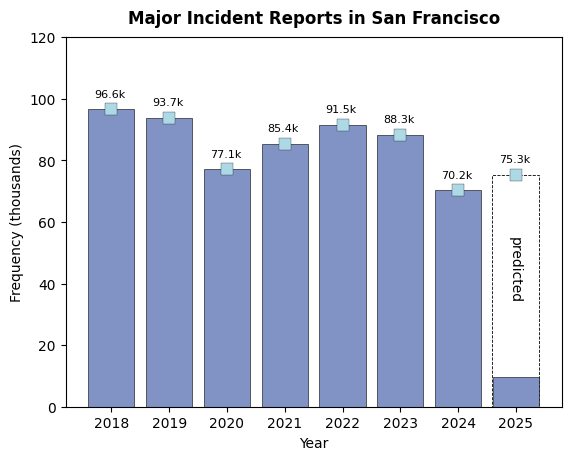

In [23]:
# linear regression 
yearly_sums_after_cleaning = unified_data['Incident Year'].value_counts().sort_index()

X = np.array(yearly_sums_after_cleaning.index)[:-1]
X = X.reshape(len(X), 1)
y = np.array(yearly_sums_after_cleaning[:-1])

reg = LinearRegression().fit(X,y)
print(f"R^2 = {reg.score(X,y)}")

pred_2025 = round(reg.predict(np.array([[2025]])).item(),0)
best_fit_line = reg.predict(X)

X = X.flatten()
X = np.append(X, 2025)
y = np.append(y, pred_2025)
best_fit_line = np.append(best_fit_line, pred_2025)

palette = {
    'bars': '#8093c4',
    'line': 'grey',
    'points': 'lightblue'
}

# 2025 projection bar
plt.bar(2024.99, pred_2025/1000, color='white', edgecolor='black', linewidth=0.6, linestyle='dashed')
plt.text(2024.85, 35, 'predicted', fontsize=10, color='black', rotation=-90)
# yearly bars
plt.bar(yearly_sums_after_cleaning.index, yearly_sums_after_cleaning/1000, 
        color=palette['bars'],
        edgecolor='black', linewidth=0.4)
# lin reg best fit pred
#plt.plot(X,best_fit_line/1000, color=palette['line'], linestyle='dashed')
# datapoints + 2025 pred
plt.scatter(X,y/1000, color=palette['points'],
            marker='s', edgecolors='black', linewidths=0.2, s=80)
# bar labels
bar_labels = [f'{value/1000:.1f}k' for value in y]
for idx, label in enumerate(bar_labels):
    plt.text(X[idx]-0.3,y[idx]/1000+4, label, fontsize=8)

plt.title('Major Incident Reports in San Francisco', pad=10, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Frequency (thousands)')
plt.ylim((0,120))
plt.show()

In [24]:
# stacked bar graph for crime distribution year by year
crime_cats_yearly = pd.DataFrame(unified_data.groupby(['Incident Year', 'Incident Category']).count()['Incident ID'])
crime_cats_yearly.columns = ['frequency']
crime_cats_yearly['yearly_percentage'] = 0.0

# percentage
for year in yearly_sums_after_cleaning.index:
    percents = (crime_cats_yearly.loc[year,'frequency']/yearly_sums_after_cleaning.loc[year]).values * 100
    percents = np.round(percents,2)
    crime_cats_yearly.loc[year,'yearly_percentage'] = percents # avoid chaining

crime_cats_yearly

frequency  yearly_percentage
Incident Year Incident Category                               
2018          Arson                     354               0.37
              Assault                  8680               8.99
              Burglary                 6884               7.13
              DUI                       303               0.31
              Disorderly Conduct       2455               2.54
...                                     ...                ...
2025          Sex Offense                25               0.26
              Suicide                     9               0.09
              Theft                    2803              29.52
              Vandalism                 959              10.10
              Weapons Offense           252               2.65

[136 rows x 2 columns]

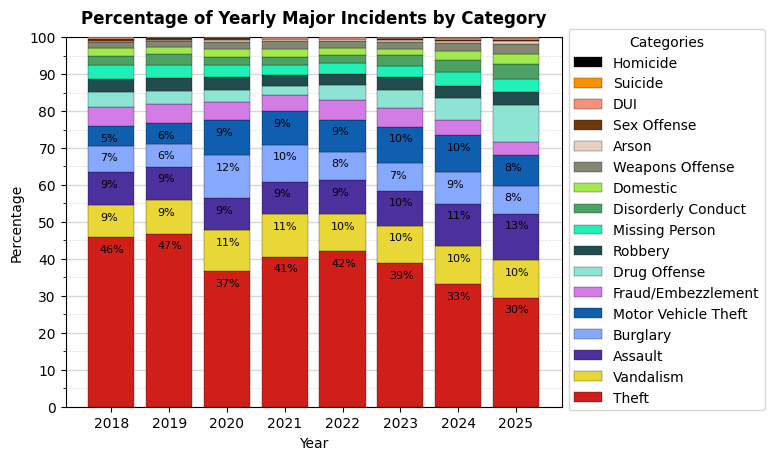

In [25]:
years = yearly_sums_after_cleaning.index.values

yearly_avg_incidents_per_cat = crime_cats_yearly.groupby("Incident Category")['frequency'].mean()
categories = yearly_avg_incidents_per_cat.sort_values(ascending=False).index.values

colors =  ["#d01f18", "#e9d737", "#4c319e", "#87a9fd", "#0f5eb0", "#d37ce6", "#8de4d3", "#214d4e", "#21f0b6", "#4ca263", "#a2e84f", "#828672", "#e6d0c2", "#6e390d", "#f49177", "#f79302", "black"]

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
bottom = 0
for i,cat in enumerate(categories):
    cat_data = crime_cats_yearly.loc[(slice(None), cat), 'yearly_percentage'].values
    ax.bar(years, cat_data, bottom=bottom, label=cat, zorder=3, color=colors[i], edgecolor='black', linewidth=0.2)

    # plot labels for top 5 categories
    if i < 5:
        bar_labels = [f'{percent:0.0f}%' for percent in cat_data]
        x = years
        y = bottom + cat_data
        for i, label in enumerate(bar_labels):
            ax.text(x[i]-0.2,y[i]-4, label, fontsize=8, zorder=4)
    
    # adjust bottom for next bar
    bottom = bottom + cat_data

ax.set_title('Percentage of Yearly Major Incidents by Category', pad=10, fontweight='bold')
ax.set_xlabel('Year')
ax.set_ylabel('Percentage')
ax.set_ylim([0,100])


ax.set_yticks(np.arange(0, 101, 10))
ax.set_yticks(np.arange(0, 101, 5), minor=True)
ax.grid(which='both')

ax.grid(which='minor', alpha=0.4, linestyle='--', linewidth=0.5, zorder=0)
ax.grid(which='major', alpha=0.5, linestyle='-', linewidth=1, zorder=0)

#ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='upper left', bbox_to_anchor=(1, 1.04), title='Categories')
plt.show()

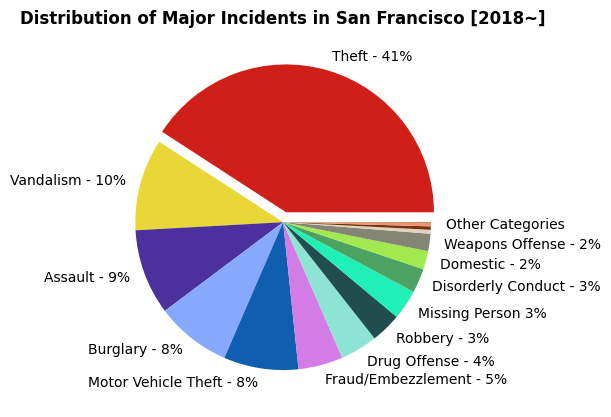

In [26]:
# pie chart showing overall major incident distribution
labels = ['Theft - 41%', 'Vandalism - 10%', 'Assault - 9%', 'Burglary - 8%', 'Motor Vehicle Theft - 8%',
       'Fraud/Embezzlement - 5%', 'Drug Offense - 4%', 'Robbery - 3%', 'Missing Person 3%',
       'Disorderly Conduct - 3%', 'Domestic - 2%', 'Weapons Offense - 2%', None,
       None, 'Other Categories', None, None]
explode = [0] * len(labels)
explode[0] = 0.07

plt.pie(incident_cats['%'], labels=labels, explode=explode, colors=colors)
plt.title('Distribution of Major Incidents in San Francisco [2018~]', pad=10, fontweight='bold')
plt.show()

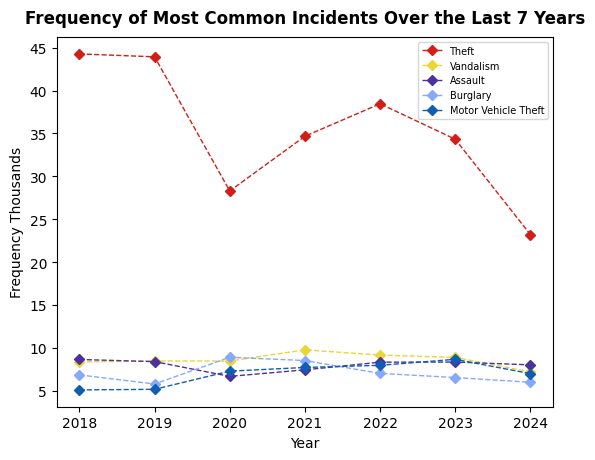

In [27]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
for i,cat in enumerate(categories[:5]):
    ax.plot(years[:-1],crime_cats_yearly.loc[(slice(None),cat),'frequency'].values[:-1]/1000, 
            label=cat, linestyle='dashed', linewidth=1, marker='D', color=colors[i], markersize=5)
ax.set_title('Frequency of Most Common Incidents Over the Last 7 Years', pad=10, fontweight='bold')
ax.set_xlabel('Year')
ax.set_ylabel('Frequency Thousands')

ax.legend(loc='upper right', fontsize=7)
plt.show()

## Crime and Time
How are crimes distributed over months of the year, days of the week, and hours of the day?

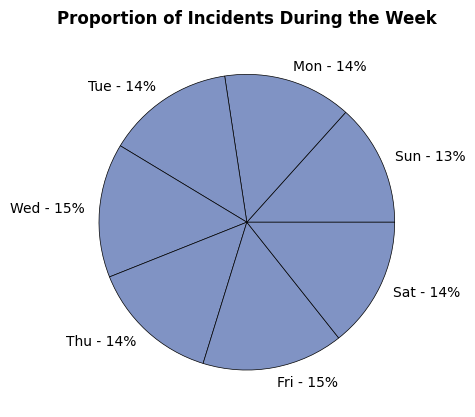

In [28]:
# crimes by day of week - order for clarity pls
day_sums = unified_data['Incident Day of Week'].value_counts(normalize=True)*100
day_sums = day_sums.loc[['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']]
pie_color = ['#8093c4']
wedgeprops = {'edgecolor': 'black', 'linewidth': .5}
labels = [f'{day[:3]} - {day_sums.loc[day]:.0f}%' for day in day_sums.index]

plt.pie(day_sums.values,labels=labels, colors=pie_color, wedgeprops=wedgeprops)
plt.title('Proportion of Incidents During the Week', pad=10, fontweight='bold')
plt.show()

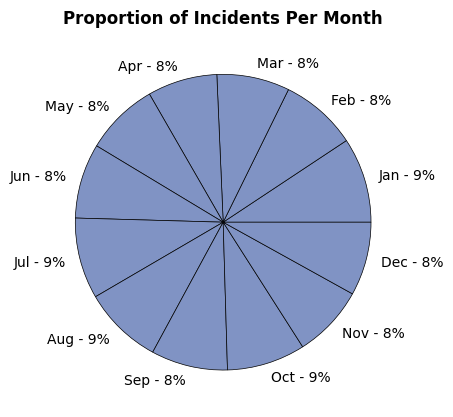

In [29]:
# crimes by months of year - do month names in order pls
month_sums = unified_data['month'].value_counts(normalize=True)*100
month_sums = month_sums.sort_index()
months = ['January','February','March','April','May','June','July','August','September','October','November','December']

plt.pie(month_sums.values, labels=[f'{months[x-1][:3]} - {month_sums[x]:.0f}%' for x in month_sums.index], colors=pie_color, wedgeprops=wedgeprops)
plt.title('Proportion of Incidents Per Month', fontweight='bold', pad=10)
plt.show()

Mean Incident Time: 16.80


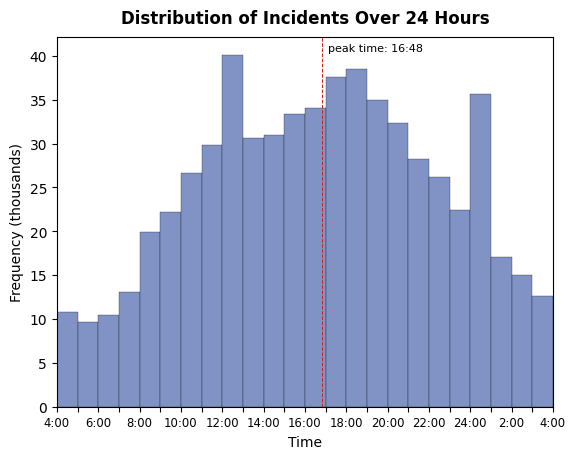

In [30]:
time = unified_data['time']
hist, bin_edges = np.histogram(time, bins=24)
bin_edges = np.round(bin_edges).astype(int)
bin_centers = (bin_edges[:-1]+bin_edges[1:])/2

bin_widths = np.diff(bin_edges)
mean_time = circmean(time, high=24, low=0)
print(f'Mean Incident Time: {mean_time:.2f}') 

# want to plot a centered histogram around the mean, so need to shift x-axis
# given circmean, find corresponding bin and shift amount
n_bins = len(hist)
shift = 0
for i in range(n_bins):
    current_bin = (bin_edges[i], bin_edges[i+1])
    if current_bin[0] <= mean_time and current_bin[1] > mean_time:
        # middle bin is n_bins/2, shift is the transformation of bin to middle
        shift = n_bins//2 - i
        break

# set up ticks for shifted axis
ticks = np.linspace(0,24,num=25, dtype=int)
labels = np.linspace(0-shift,24-shift,num=25, dtype=int)
labels[shift:] = labels[shift:] - 24
labels = list(labels)
for i, label in enumerate(labels):
    if i % 2 == 1:
        labels[i] = None
        continue
    labels[i] = f'{str(label)}:00'

plt.bar(bin_centers, np.roll(hist,shift=shift)/1000, width=bin_widths,
        edgecolor='black', linewidth=0.2, color='#8093c4')
plt.axvline(x=mean_time+shift, color="#d01f18", linestyle='dashed', linewidth=0.7)
plt.text(mean_time+shift+0.3, 40.5, f'peak time: {int(mean_time)}:{(mean_time%1)*60:.0f}', fontsize=8)

plt.title('Distribution of Incidents Over 24 Hours', fontweight='bold', pad=10)
plt.xlabel('Time')
plt.ylabel('Frequency (thousands)')
plt.xticks(ticks, labels=labels, fontsize='small')
plt.xlim(0,24)
plt.show()

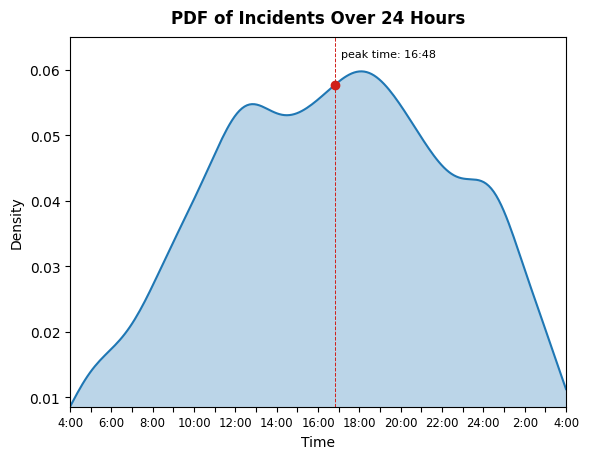

In [31]:
from scipy.stats import gaussian_kde

hist_values = np.roll(hist,shift=shift)
kde = gaussian_kde(np.repeat(bin_centers,hist_values), bw_method=0.2)
x_range = np.linspace(0,24,200)
pdf = kde(x_range)

plt.plot(x_range, pdf)
plt.fill_between(x_range, pdf, alpha=0.3)
plt.axvline(x=mean_time+shift, color="#d01f18", linestyle='dashed', linewidth=0.7)
plt.text(mean_time+shift+0.3, 0.062, f'peak time: {int(mean_time)}:{(mean_time%1)*60:.0f}', fontsize=8)
plt.scatter(mean_time+shift, pdf[int((mean_time+shift)/(24/200))], zorder=3, color="#d01f18")

plt.xticks(ticks, labels=labels, fontsize='small')
plt.xlim(min(x_range), max(x_range))
plt.ylim(min(pdf),0.065)

plt.title('PDF of Incidents Over 24 Hours', fontweight='bold', pad=10)

plt.xlabel('Time')
plt.ylabel('Density')
plt.show()


### Crime by Neighborhood

In [32]:
neighborhood_sums = unified_data['Analysis Neighborhood'].value_counts().sort_values(ascending=False)
print(neighborhood_sums[:10])
print(len(neighborhood_sums))

Analysis Neighborhood
Mission                           62828
Tenderloin                        56969
Financial District/South Beach    48773
South of Market                   48280
Bayview Hunters Point             37378
North Beach                       22820
Western Addition                  20914
Sunset/Parkside                   19017
Hayes Valley                      18835
Marina                            18466
Name: count, dtype: int64
41


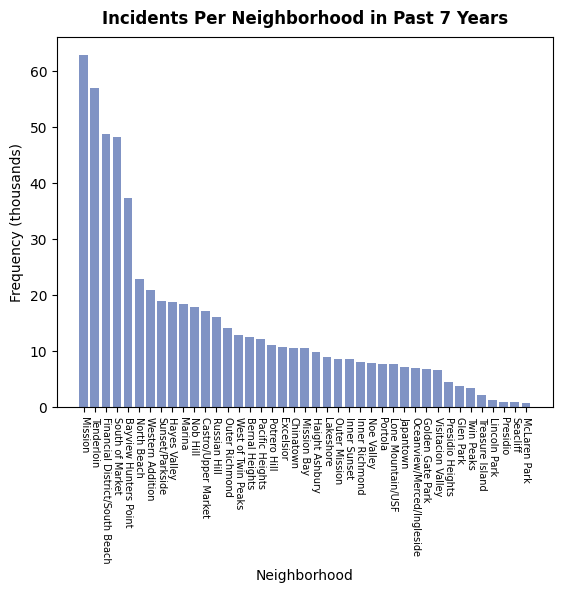

In [33]:
plt.bar(neighborhood_sums.index, neighborhood_sums/1000, color='#8093c4')
plt.xticks(rotation=-90, fontsize=7)
plt.title('Incidents Per Neighborhood in Past 7 Years', fontweight='bold', pad=10)
plt.xlabel('Neighborhood')
plt.ylabel('Frequency (thousands)')
plt.show()

In [34]:
# how has distribution over the top ten neighborhoods changed
neighborhood_yearly = pd.DataFrame(unified_data.groupby(['Incident Year','Analysis Neighborhood']).count()['Incident ID'])
neighborhood_yearly.columns = ['frequency']
neighborhood_yearly['yearly_percentage'] = 0.0

# percentage
for year in yearly_sums_after_cleaning.index:
    percents = (neighborhood_yearly.loc[year,'frequency']/yearly_sums_after_cleaning.loc[year]).values * 100
    percents = np.round(percents,2)
    neighborhood_yearly.loc[year,'yearly_percentage'] = percents # avoid chaining

neighborhood_yearly

frequency  yearly_percentage
Incident Year Analysis Neighborhood                              
2018          Bayview Hunters Point       5167               5.35
              Bernal Heights              1628               1.69
              Castro/Upper Market         2892               2.99
              Chinatown                   1834               1.90
              Excelsior                   1453               1.50
...                                        ...                ...
2025          Treasure Island               43               0.45
              Twin Peaks                    28               0.29
              Visitacion Valley             88               0.93
              West of Twin Peaks           172               1.81
              Western Addition             346               3.64

[327 rows x 2 columns]

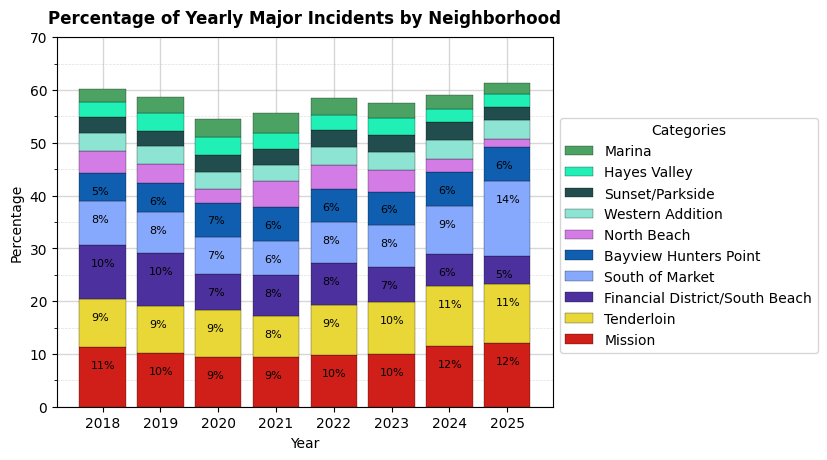

In [35]:
yearly_avg_incidents_per_neighborhood = neighborhood_yearly.groupby("Analysis Neighborhood")['frequency'].mean()
neighborhoods = yearly_avg_incidents_per_neighborhood.sort_values(ascending=False).index.values

colors =  ["#d01f18", "#e9d737", "#4c319e", "#87a9fd", "#0f5eb0", "#d37ce6", "#8de4d3", "#214d4e", "#21f0b6", "#4ca263", "#a2e84f", "#828672", "#e6d0c2", "#6e390d", "#f49177", "#f79302", "black"]

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
bottom = 0
for i,neigh in enumerate(neighborhoods[0:10]):
    neigh_data = neighborhood_yearly.loc[(slice(None), neigh), 'yearly_percentage'].values
    ax.bar(years, neigh_data, bottom=bottom, label=neigh, zorder=3, color=colors[i], edgecolor='black', linewidth=0.2)

    # plot labels for top 5 neighborhoods
    if i < 5:
        bar_labels = [f'{percent:0.0f}%' for percent in neigh_data]
        x = years
        y = bottom + neigh_data
        for i, label in enumerate(bar_labels):
            ax.text(x[i]-0.2,y[i]-4, label, fontsize=8, zorder=4)
    
    # adjust bottom for next bar
    bottom = bottom + neigh_data

ax.set_title('Percentage of Yearly Major Incidents by Neighborhood', pad=10, fontweight='bold')
ax.set_xlabel('Year')
ax.set_ylabel('Percentage')
ax.set_ylim([0,70])


ax.set_yticks(np.arange(0, 71, 10))
ax.set_yticks(np.arange(0, 71, 5), minor=True)
ax.grid(which='both')

ax.grid(which='minor', alpha=0.4, linestyle='--', linewidth=0.5, zorder=0)
ax.grid(which='major', alpha=0.5, linestyle='-', linewidth=1, zorder=0)

#ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='upper left', bbox_to_anchor=(1, 0.8), title='Categories')
plt.show()

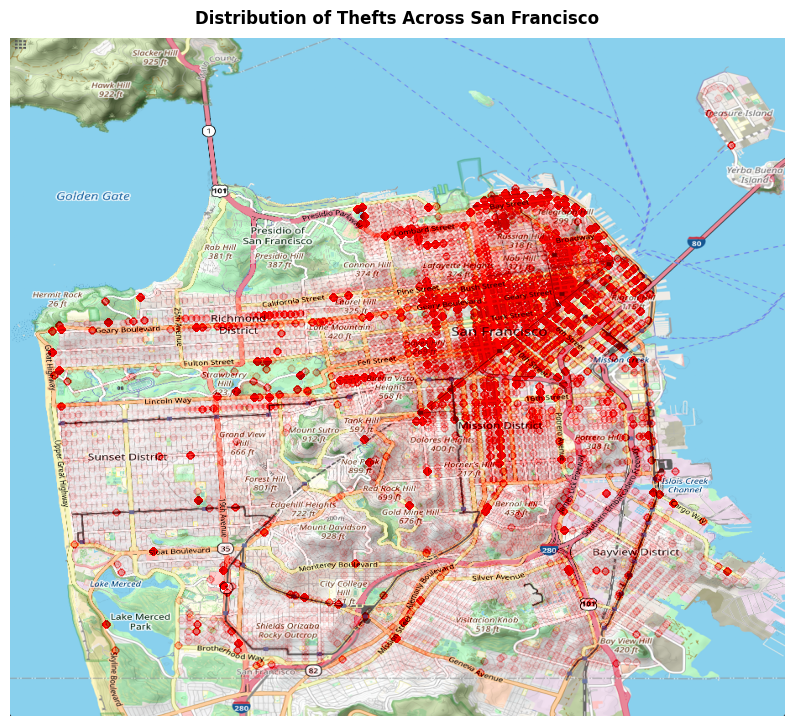

In [36]:
map_data = unified_data[unified_data['Incident Category'] == 'Theft'][['Longitude','Latitude']]
sfmap = mpimg.imread('sfmap.png')

x = map_data['Longitude'].values
y = map_data['Latitude'].values

plt.figure(figsize=(10, 10))

plt.scatter(x, y, alpha=0.005, s=25, color="red")

plt.xlim(-122.52,-122.36)
plt.ylim(37.7,37.84)
plt.imshow(sfmap, extent=[-122.52, -122.36, 37.7, 37.84])

plt.title('Distribution of Thefts Across San Francisco', pad=10, fontweight='bold')
plt.axis('off')
plt.show()